In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")

In [4]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [6]:
# Clean data
df_filtered = df[
    (df["value"] >= df["value"].quantile(0.025)) &
    (df["value"] <= df["value"].quantile(0.975))
]

In [7]:
df_filtered.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))

In [ ]:
ax.plot(df_filtered.index, df_filtered["value"], color="red", linewidth=1)

In [ ]:
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

In [ ]:
plt.show()

In [ ]:
fig.savefig("line_plot.png")

In [ ]:
# Bar Plot

In [ ]:
df_filtered.head()

In [ ]:
df_filtered.index.year

In [ ]:
df_filtered.loc[:, 'year'] = df_filtered.index.year
df_filtered.loc[:, 'month'] = df_filtered.index.strftime('%B')

In [ ]:
df_filtered.head()

In [ ]:
df_groupby = df_filtered.groupby(["year", "month"])["value"].mean().unstack()

In [ ]:
df_groupby.info()

In [ ]:
ax = df_groupby.plot(kind="bar", figsize=(8, 14))

In [ ]:
ax.set_ylabel("Average Page Views")

In [ ]:
plt.show()

In [ ]:
fig = ax.get_figure()
fig.savefig("bar_plot.png")

In [8]:
import seaborn as sns

In [9]:
df_box = df_filtered.copy()

In [10]:
df_box.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [16]:
df_box["year"] = df_box.index.year

In [17]:
df_box["month"] = df_box.index.strftime("%B")

In [18]:
df_box.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   value   1238 non-null   int64 
 1   year    1238 non-null   int32 
 2   month   1238 non-null   object
dtypes: int32(1), int64(1), object(1)
memory usage: 33.9+ KB


In [19]:
df_box.head()

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May


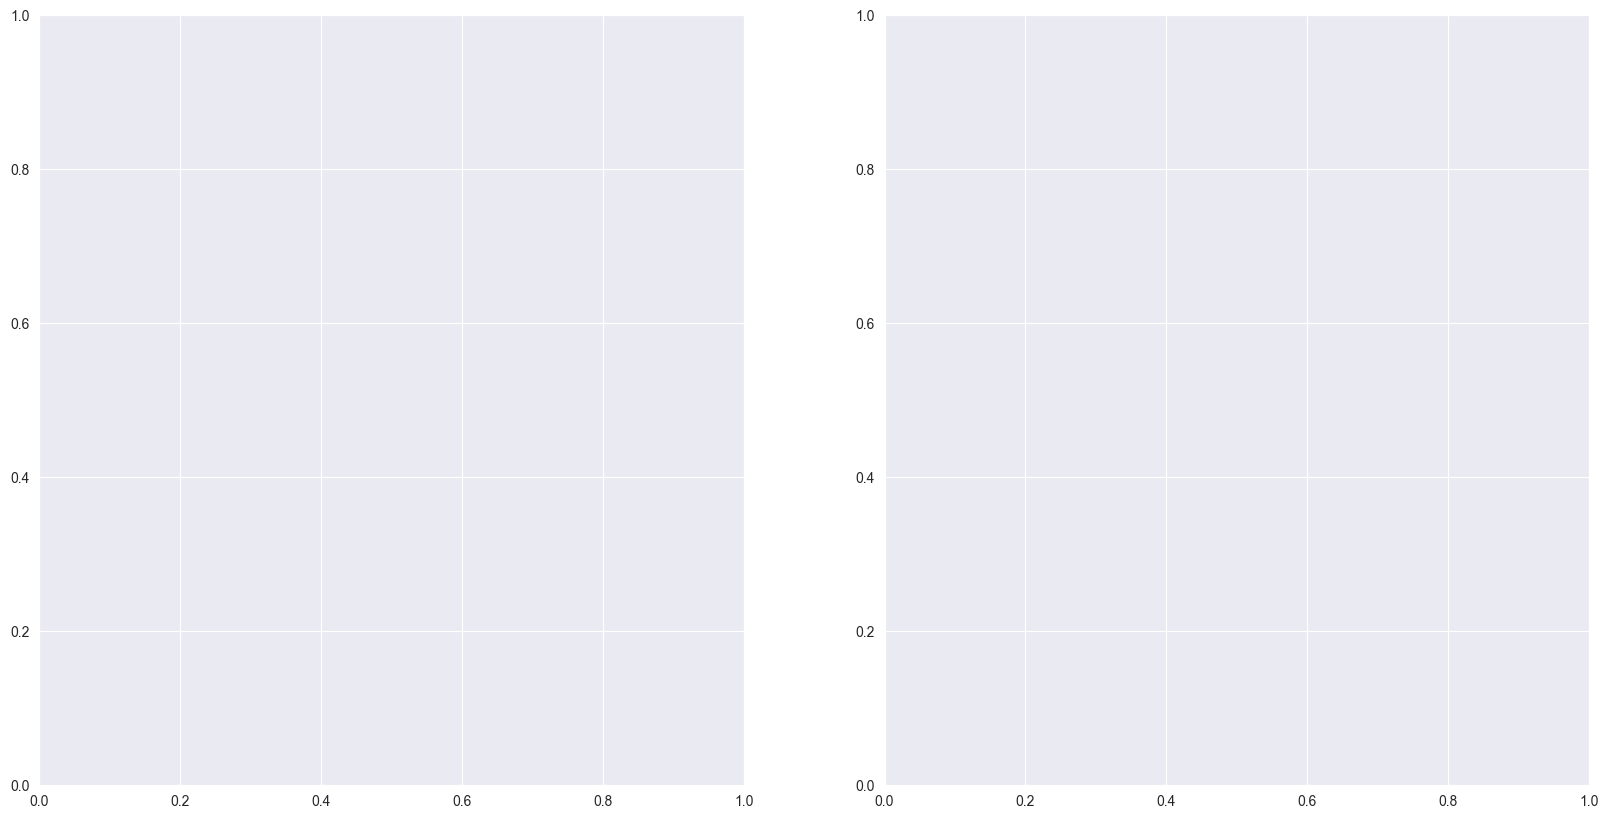

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

In [24]:
sns.boxplot(x="year", y="value", data=df_box, ax=ax1)

<Axes: xlabel='year', ylabel='value'>

In [25]:
ax1.set_title("Year-wise Box Plot (Trend)")
ax1.set_xlabel("Year")

Text(0.5, 4.4444444444444375, 'Year')

In [26]:
ax1.set_ylabel("Page Views")

Text(4.44444444444448, 0.5, 'Page Views')

In [27]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [28]:
sns.boxplot(x="month", y="value", data=df_box, ax=ax2, order=month_order)

<Axes: xlabel='month', ylabel='value'>

In [29]:
ax2.set_title("Month wise Box Plot (Seasonality)")

Text(0.5, 1.0, 'Month wise Box Plot (Seasonality)')

In [30]:
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")

Text(849.8989898989898, 0.5, 'Page Views')

In [31]:
plt.show()

In [32]:
fig.savefig("box_plot.png")